In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib as plt
mpl.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [5]:
from sklearn.datasets import load_boston
import pandas as pd

boston= load_boston()

In [6]:
type(boston)

sklearn.utils.Bunch

In [7]:
from sklearn.utils import Bunch

In [8]:
[x for x in boston]

['data', 'target', 'feature_names', 'DESCR', 'filename']

In [13]:
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target) 

df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
df_y.columns = ['MEDV']
df_y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [18]:
df = pd.concat([df_x, df_y], axis=1) #Must combine over axis 1 to use same index

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

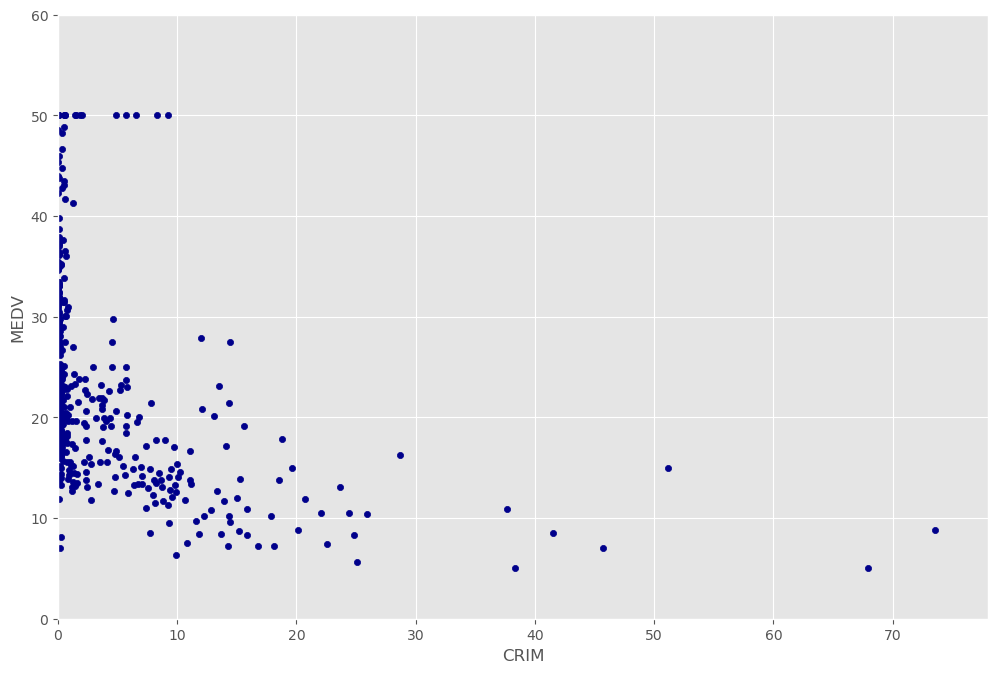

In [19]:
df.plot.scatter(x='CRIM',
               y='MEDV',
               c='DarkBlue',
               ylim=(0,60),
               xlim=(0,78))

<AxesSubplot:xlabel='AGE', ylabel='MEDV'>

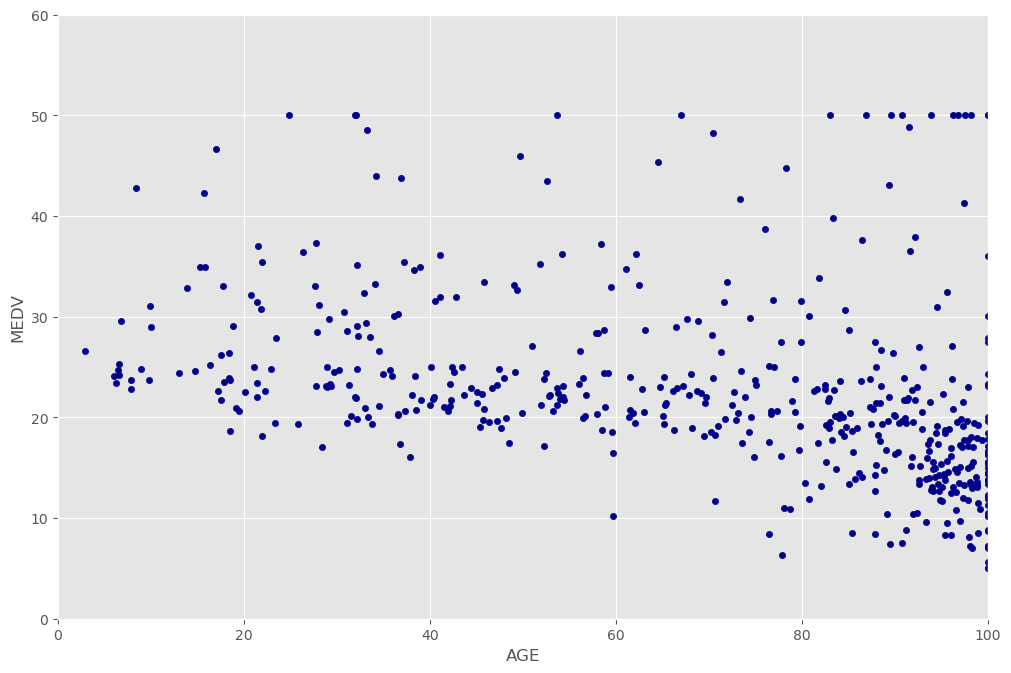

In [20]:
df.plot.scatter(x='AGE',
               y='MEDV',
               c='DarkBlue',
               ylim=(0,60),
               xlim=(0,100))

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reg = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33,   random_state=42)

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

In [22]:
### let's measure our success with an actual number!
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred) #there we go

20.72402343733974

In [23]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=df, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     89.01
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          4.90e-115
Time:                        15:23:29   Log-Likelihood:                -1548.6
No. Observations:                 506   AIC:                             3123.
Df Residuals:                     493   BIC:                             3178.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.6526      5.368      3.848      0.0